# Capstone 1 - Data Story

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

# Contents of this notebook:
## Data wrangling and feature and target descriptions
## Time series plots
## Histograms
## Scatterplots of features versus target

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

# Data wrangling and descriptions of each feature and target dataset
## The below financial data are sourced from S&P or FactSet through .txt or Excel download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Activity

## The Chicago Fed National Activity Index (CFNAI) is an amalgamation of many economic indicators that reflect the broader level of economic activity

### The data reflect percentage change, and hence there is no need to, say, divide month-on-month or year-on-year

In [2]:
activity = pd.read_csv('activity.csv', header=0, index_col=0, parse_dates=True)

print(activity.head())

print('\nAre there nulls: {}'.format(activity.isnull().any().any()))

print('\nConvert to yyyy-mm:\n')

activity.index = activity.index.strftime('%Y-%m')

print(activity.head())

               CFNAI
Date                
1988-12-30  0.831839
1989-01-27  0.461583
1989-02-24 -0.513923
1989-03-31 -0.170541
1989-04-28  0.136473

Are there nulls: False

Convert to yyyy-mm:

            CFNAI
1988-12  0.831839
1989-01  0.461583
1989-02 -0.513923
1989-03 -0.170541
1989-04  0.136473


# Inflation

## CPI (consumer price index) serves as a widely used proxy for overall inflation

### CPI data are published monthly and periodically is sometimes normalized, or re-based, to 100

### It is common to report the annual change in inflation, and hence the inflation series will be converted to year-on-year percentage change

In [3]:
inflation = pd.read_csv('inflation.csv', header=0, index_col=0, parse_dates=True)

print(inflation.head())

print('\nAre there nulls: {}'.format(inflation.isnull().any().any()))

print('\nConvert to yyyy-mm:\n')

inflation.index = inflation.index.strftime('%Y-%m')

print(inflation.head())

print('\nConvert to year-on-year:\n')

inflation = inflation / inflation.shift(12) - 1
inflation = inflation.loc['1990-01':]

print(inflation.head())

              CPI
Date             
1989-01-31  121.2
1989-02-28  121.6
1989-03-31  122.2
1989-04-28  123.1
1989-05-31  123.7

Are there nulls: False

Convert to yyyy-mm:

           CPI
1989-01  121.2
1989-02  121.6
1989-03  122.2
1989-04  123.1
1989-05  123.7

Convert to year-on-year:

              CPI
1990-01  0.051980
1990-02  0.052632
1990-03  0.052373
1990-04  0.047116
1990-05  0.043654


# Money Supply

## M2, or money supply, is often seen as a coincident indicator of overall economic activity

### During times when the Federal Reserve adopts a stimulative approach, money supply tends to increase more than during times when the Fed's approach is restrictive

### As with inflation, the annual change in money supply is often reported, and hence the series will be converted to YoY

In [4]:
M2 = pd.read_csv('money supply.csv', header=0, index_col=0, parse_dates=True)

print(M2.head())

print('\nAre there nulls: {}'.format(M2.isnull().any().any()))

print('\nConvert to yyyy-mm:\n')

M2.index = M2.index.strftime('%Y-%m')

print(M2.head())

print('\nConvert to year-on-year:\n')

M2 = M2 / M2.shift(12) - 1
M2 = M2.loc['1989-12':]

print(M2.head())

                M2
Date              
1988-12-30  2989.5
1989-01-27  2994.6
1989-02-24  2987.1
1989-03-31  3002.7
1989-04-28  3008.9

Are there nulls: False

Convert to yyyy-mm:

             M2
1988-12  2989.5
1989-01  2994.6
1989-02  2987.1
1989-03  3002.7
1989-04  3008.9

Convert to year-on-year:

               M2
1989-12  0.056130
1990-01  0.057370
1990-02  0.064544
1990-03  0.063776
1990-04  0.064475


# Manufacturing

## ISM manufacturing data reflects overall activity as it relates to many firms that belong to the manufacturing and industrials sectors

### The data are reported monthly and will be converted to QoQ

In [5]:
ISM = pd.read_csv('manufacturing.csv', names=['Date', 'ISM'], index_col=0, parse_dates=True)

print(ISM.head())

print('\nAre there nulls: {}'.format(ISM.isnull().any().any()))

print('\nConvert to yyyy-mm:\n')

ISM.index = ISM.index.strftime('%Y-%m')

print(ISM.head())

print('\nConvert to quarter-on-quarter:\n')

ISM = ISM / ISM.shift(3) - 1
ISM = ISM.loc['1989-03':]

print(ISM.head())

             ISM
Date            
1988-12-30  59.0
1989-01-31  57.3
1989-02-28  57.3
1989-03-31  52.0
1989-04-28  53.1

Are there nulls: False

Convert to yyyy-mm:

          ISM
1988-12  59.0
1989-01  57.3
1989-02  57.3
1989-03  52.0
1989-04  53.1

Convert to quarter-on-quarter:

              ISM
1989-03 -0.118644
1989-04 -0.073298
1989-05 -0.115183
1989-06 -0.123077
1989-07 -0.137476


# Fixed Income

## The butterfly spread that involves fixed income instruments is often seen as a means of measuring the orientation of the yield curve, and some research suggests that level, shape, and curvature of the yield curve foretell economic performance

### The butterfly spread equals the yield of the long-dated US Treasury bond (generally the 20-year or 30-year bond), minus two times the yield of the intermediate-term US Treasury note (often the 10-year note is used), plus the yield of the short-term US Treasury bill (usually the 3-month bill)

### Fixed income yields are usually reported daily, so the series will have to be downsampled to monthly

### Additionally, it might be that one of the instruments reported a yield on a day where another instrument did not (such as on quasi-holidays like Columbus Day or Veteran's Day), and hence the nulls will have to be forward-filled

In [6]:
bfly = pd.read_csv('FI.csv', header=0, index_col=0, parse_dates=True)

print(bfly.head())

print('\nAre there nulls: {}\n\nForward-fill...'.format(bfly.isnull().any().any()))

bfly.fillna(method='ffill', inplace=True)

print('\nCheck again if there are nulls: {}\n'.format(bfly.isnull().any().any()))

print('Downsample to monthly:\n')

bfly = bfly.resample('M').last()

print(bfly.head())

print('\nCreate butterfly spread:\n')

bfly['bfly'] = bfly['20Y'] - 2 * bfly['10Y'] + bfly['3M']

print(bfly.head())

print('\nConvert to yyyy-mm and only keep the spread:\n')

bfly.index = bfly.index.strftime('%Y-%m')

bfly.drop(['3M', '10Y', '20Y'], inplace=True, axis=1)

print(bfly.head())

              3M   10Y   20Y
Date                        
1998-01-01  5.22  5.75  5.94
1998-01-02  5.18  5.67  5.94
1998-01-05  5.09  5.52  5.82
1998-01-06  5.08  5.49  5.80
1998-01-07  5.09  5.55  5.88

Are there nulls: True

Forward-fill...

Check again if there are nulls: False

Downsample to monthly:

              3M   10Y   20Y
Date                        
1998-01-31  5.06  5.53  5.88
1998-02-28  5.18  5.62  5.99
1998-03-31  5.02  5.67  6.02
1998-04-30  4.87  5.68  6.04
1998-05-31  4.89  5.56  5.90

Create butterfly spread:

              3M   10Y   20Y  bfly
Date                              
1998-01-31  5.06  5.53  5.88 -0.12
1998-02-28  5.18  5.62  5.99 -0.07
1998-03-31  5.02  5.67  6.02 -0.30
1998-04-30  4.87  5.68  6.04 -0.45
1998-05-31  4.89  5.56  5.90 -0.33

Convert to yyyy-mm and only keep the spread:

         bfly
1998-01 -0.12
1998-02 -0.07
1998-03 -0.30
1998-04 -0.45
1998-05 -0.33


# Dividend Yield

## The dividend yield reflects the % of dividends paid in a portfolio over the past twelve months

### Some columns will have to be deleted, and then the dividend yield spread (dividend yield of one index minus that of the other) will have to be computed

In [7]:
divy = pd.read_csv('dividend yield.csv', header=0, parse_dates=True)

print(divy.head())

print('\nKeep the date and dividend yield columns, and re-name accordingly:\n')

divy = divy[['Effective Date', 'Dividend Yield', 'Dividend Yield.1']]

divy.columns = ['Date', 'Growth', 'Value']

print(divy.head())

print('\nAre there nulls: {}'.format(divy.isnull().any().any()))

print('\nConvert to yyyy-mm:\n')

divy['Date'] = pd.to_datetime(divy['Date'].astype(str))

divy.index = divy['Date']

divy.index = divy.index.strftime('%Y-%m')

divy.drop('Date', inplace=True, axis=1)

print(divy.head())

print('\nCompute dividend yield spread (value minus growth):\n')

divy['divy'] = divy['Value'] - divy['Growth']

divy.drop(['Growth', 'Value'], inplace=True, axis=1)

print(divy.head())

  Index Code                    Index Name Effective Date  Dividend Yield  \
0      600PG  S&P SmallCap 600 Pure Growth      6/28/1996        0.228966   
1      600PG  S&P SmallCap 600 Pure Growth      7/31/1996        0.252506   
2      600PG  S&P SmallCap 600 Pure Growth      8/30/1996        0.227854   
3      600PG  S&P SmallCap 600 Pure Growth      9/30/1996        0.228062   
4      600PG  S&P SmallCap 600 Pure Growth     10/31/1996        0.228189   

  Index Code.1                 Index Name.1 Effective Date.1  Dividend Yield.1  
0        600PV  S&P SmallCap 600 Pure Value        6/28/1996          2.671998  
1        600PV  S&P SmallCap 600 Pure Value        7/31/1996          2.824577  
2        600PV  S&P SmallCap 600 Pure Value        8/30/1996          2.675723  
3        600PV  S&P SmallCap 600 Pure Value        9/30/1996          2.630586  
4        600PV  S&P SmallCap 600 Pure Value       10/31/1996          2.630315  

Keep the date and dividend yield columns, and re-n

# Growth versus Value (the target)

## A popular trading strategy involves predicting the upcoming returns spread between different types of investment styles, and two prominent (and also opposing) styles are "growth" and "value"

### Growth stocks observe high price-to-earnings ratios and high growth in earnings per share, whereas value stocks observe low price-to-earning, price-to-book-value, and price-to-sales ratios

### The two indices contained in the CSV file each contain as constituents stocks that are deemed, by several metrics, very strong in terms of the value or growth factor

### The data need to be pivoted, downsampled to monthly, and then the upcoming quarterly returns spread must be computed, where the returns spread equals the difference between the return of the value strategy and the return of the growth strategy

In [8]:
VG = pd.read_csv('growth and value.csv', header=0, index_col=2, parse_dates=True)

print(VG.head())

print('\nPivot and re-name columns:\n')

VG = VG.pivot(columns='INDEX_CODE', values='CLOSE_INDEX_VALUE')

VG.columns = ['Growth', 'Value']

print(VG.head())

print('\nAre there nulls: {}'.format(VG.isnull().any().any()))

print('\nDownsample to monthly and convert to yyyy-mm:\n')

VG = VG.resample('M').last()

VG.index = VG.index.strftime('%Y-%m')

print(VG.head())

print('\nCompute the forward-looking quarterly returns spread:\n')

VG['Spread'] = VG['Value'].shift(-3) / VG['Value'] - VG['Growth'].shift(-3) / VG['Growth']

VG = VG.loc['1995-06':'2018-12']

VG.drop(['Growth', 'Value'], inplace=True, axis=1)

print(VG.head())

                                   INDEX_NAME INDEX_CODE  CLOSE_INDEX_VALUE  \
INDEX_DATE                                                                    
1995-06-30  S&P SmallCap 600 Pure Growth (TR)    600PGTR        1005.194369   
1995-07-03  S&P SmallCap 600 Pure Growth (TR)    600PGTR        1002.779567   
1995-07-05  S&P SmallCap 600 Pure Growth (TR)    600PGTR        1010.725896   
1995-07-06  S&P SmallCap 600 Pure Growth (TR)    600PGTR        1021.284240   
1995-07-07  S&P SmallCap 600 Pure Growth (TR)    600PGTR        1033.069913   

            NET_CHANGE  % CHANGE  
INDEX_DATE                        
1995-06-30         NaN       NaN  
1995-07-03   -2.414802 -0.002402  
1995-07-05    7.946329  0.007924  
1995-07-06   10.558344  0.010446  
1995-07-07   11.785672  0.011540  

Pivot and re-name columns:

                 Growth        Value
INDEX_DATE                          
1995-06-30  1005.194369  1006.133457
1995-07-03  1002.779567  1004.279215
1995-07-05  1010.725896 

## Note that for visualization and EDA purposes, the target will remain continuous, yet it will be coerced to Boolean, given that the predictive models are classifiers

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

# Visualizations - time series plots, histograms, feature-vs-target scatterplots

## We begin with simple time series plots
### The series begin on different dates, as shown in the plots

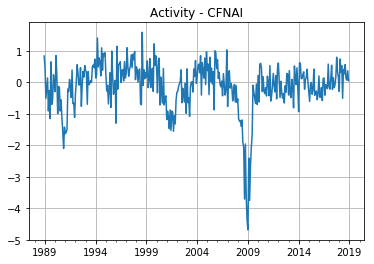

In [9]:
activity.index = pd.to_datetime(activity.index.astype(str))
activity.plot(legend=None)
plt.title('Activity - CFNAI')
plt.grid()
plt.show()

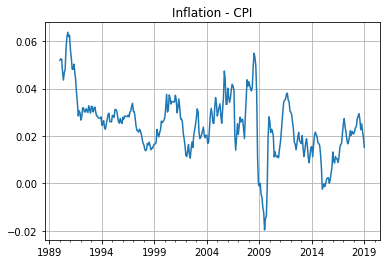

In [10]:
inflation.index = pd.to_datetime(inflation.index.astype(str))
inflation.plot(legend=None)
plt.title('Inflation - CPI')
plt.grid()
plt.show()

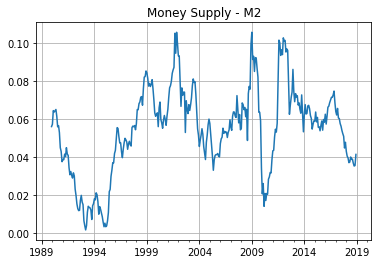

In [11]:
M2.index = pd.to_datetime(M2.index.astype(str))
M2.plot(legend=None)
plt.title('Money Supply - M2')
plt.grid()
plt.show()

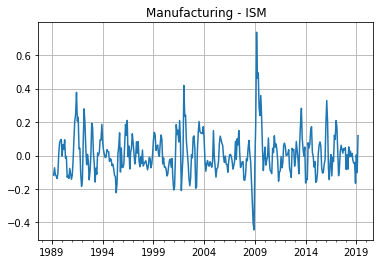

In [12]:
ISM.index = pd.to_datetime(ISM.index.astype(str))
ISM.plot(legend=None)
plt.title('Manufacturing - ISM')
plt.grid()
plt.show()

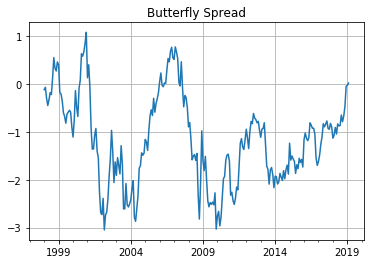

In [13]:
bfly.index = pd.to_datetime(bfly.index.astype(str))
bfly.plot(legend=None)
plt.title('Butterfly Spread')
plt.grid()
plt.show()

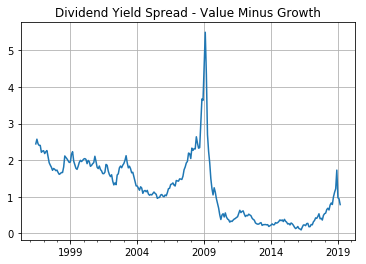

In [14]:
divy.index = pd.to_datetime(divy.index.astype(str))
divy.plot(legend=None)
plt.title('Dividend Yield Spread - Value Minus Growth')
plt.grid()
plt.show()

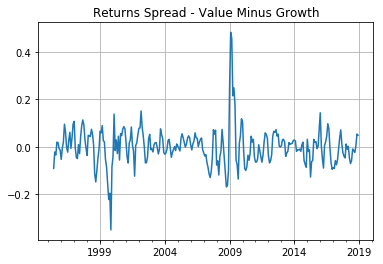

In [15]:
VG.index = pd.to_datetime(VG.index.astype(str))
VG.plot(legend=None)
plt.title('Returns Spread - Value Minus Growth')
plt.grid()
plt.show()

### The time series plots all exhibit significant disturbance around 2008-09 due to the financial crisis.  The features all tend to behave very anomalously during this period.  Of interest is whether the target (the returns spread between the value and growth portfolios) can be more accurately predicted by the features.

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

## We now plot histograms

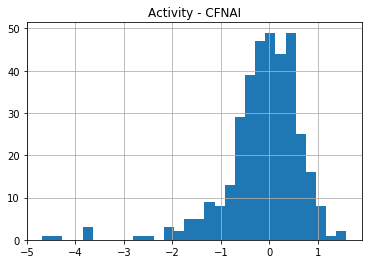

In [16]:
plt.hist(x='CFNAI', data=activity, bins=30)
plt.title('Activity - CFNAI')
plt.grid()
plt.show()

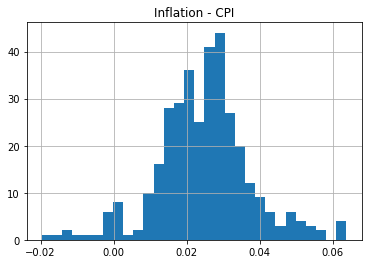

In [17]:
plt.hist(x='CPI', data=inflation, bins=30)
plt.title('Inflation - CPI')
plt.grid()
plt.show()

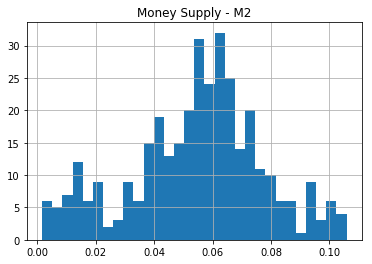

In [18]:
plt.hist(x='M2', data=M2, bins=30)
plt.title('Money Supply - M2')
plt.grid()
plt.show()

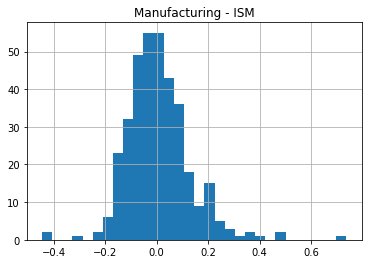

In [19]:
plt.hist(x='ISM', data=ISM, bins=30)
plt.title('Manufacturing - ISM')
plt.grid()
plt.show()

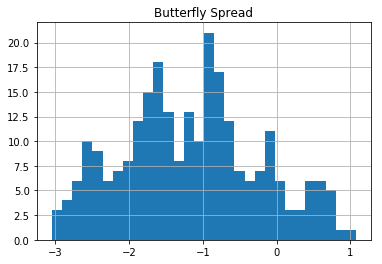

In [20]:
plt.hist(x='bfly', data=bfly, bins=30)
plt.title('Butterfly Spread')
plt.grid()
plt.show()

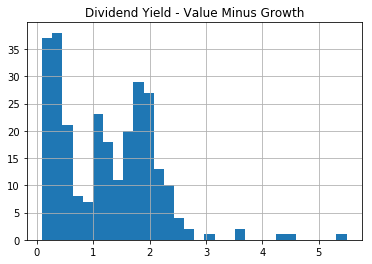

In [21]:
plt.hist(x='divy', data=divy, bins=30)
plt.title('Dividend Yield - Value Minus Growth')
plt.grid()
plt.show()

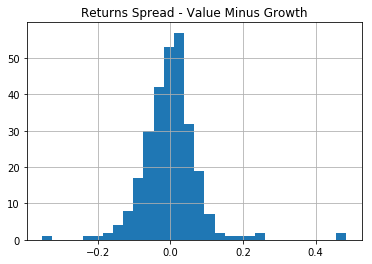

In [22]:
plt.hist(x='Spread', data=VG, bins=30)
plt.title('Returns Spread - Value Minus Growth')
plt.grid()
plt.show()

### For the histograms, some features witness outliers, whereas others appear fairly normally distributed and/or somewhat skewed.  For example, the dividend yield spread appears heavily skewed right.  The activity distribution, on the other hand, observes a few outliers in the left tail.

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

## To plot scatterplots against the target, we use as the earliest date that which has no missing values, which is Jan 1998

### We also remove the last three observations, given that the Dec 2018 observation for the target is the forward-looking three-months returns spread and that the data are collected as of Mar 2019

In [23]:
concat = pd.concat([activity, inflation, M2, ISM, bfly, divy, VG], axis=1, sort=True)

# remove last three observations due to nulls

concat = concat.iloc[:-3]

# check to see the first row where there are no nulls

concat.dropna().head(1)

,CFNAI,CPI,M2,ISM,bfly,divy,Spread
1998-01-01,0.489545,0.016311,0.057697,-0.062397,-0.12,1.729028,-0.037195


In [24]:
concat = concat.dropna()

## Now scatter all features against the target

### We will overlay any target outliers that themselves are and are not outliers with respect to the feature's univariate distribution in red and green fill, respectively. 

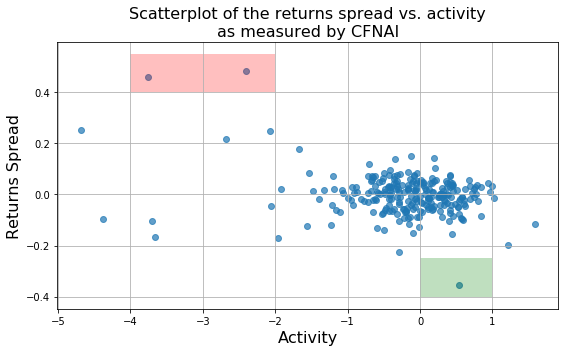

The observations with returns spread greater than 0.4 are themselves additionally outliers with reference to the single-variable distribution for 'activity.'  Hence, red fill.  On the other hand, the observation with returns spread less than -0.3 does not witness an anomalous value for 'activity.'  Hence, green fill.


In [25]:
# scatter the returns spread versus activity

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x='CFNAI', y='Spread', data=concat, alpha=0.7)

ax.fill_between([-4,-2], 0.4, 0.55, facecolor='red', alpha=0.25, interpolate=True)
ax.fill_between([0, 1], -0.4, -0.25, facecolor='green', alpha=0.25, interpolate=True)

ax.set_xlabel('Activity', fontsize=16)
ax.set_ylabel('Returns Spread', fontsize=16)
ax.set_title('Scatterplot of the returns spread vs. activity\nas measured by CFNAI', fontsize=16)

ax.grid(True)
fig.tight_layout()
plt.show()

print('The observations with returns spread greater than 0.4 are themselves additionally outliers with reference to the \
single-variable distribution for \'activity.\'  Hence, red fill.  On the other hand, the observation with returns spread \
less than -0.3 does not witness an anomalous value for \'activity.\'  Hence, green fill.')

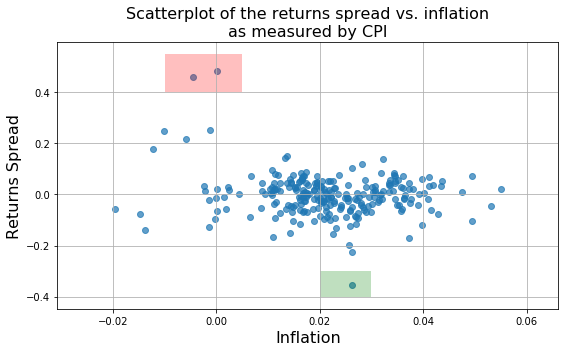

In [26]:
# scatter the returns spread versus inflation

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x='CPI', y='Spread', data=concat, alpha=0.7)

ax.fill_between([-0.01, 0.005], 0.4, 0.55, facecolor='red', alpha=0.25, interpolate=True)
ax.fill_between([0.02, 0.03], -0.4, -0.3, facecolor='green', alpha=0.25, interpolate=True)

ax.set_xlabel('Inflation', fontsize=16)
ax.set_ylabel('Returns Spread', fontsize=16)
ax.set_title('Scatterplot of the returns spread vs. inflation\nas measured by CPI', fontsize=16)

ax.grid(True)
fig.tight_layout()

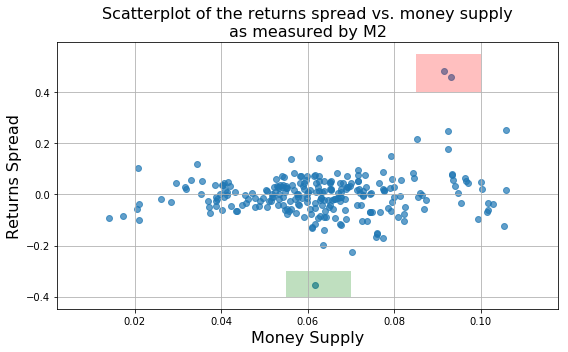

In [27]:
# scatter the returns spread versus money supply

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x='M2', y='Spread', data=concat, alpha=0.7)

ax.fill_between([0.085, 0.1], 0.4, 0.55, facecolor='red', alpha=0.25, interpolate=True)
ax.fill_between([0.055, 0.07], -0.4, -0.3, facecolor='green', alpha=0.25, interpolate=True)

ax.set_xlabel('Money Supply', fontsize=16)
ax.set_ylabel('Returns Spread', fontsize=16)
ax.set_title('Scatterplot of the returns spread vs. money supply\nas measured by M2', fontsize=16)

ax.grid(True)
fig.tight_layout()

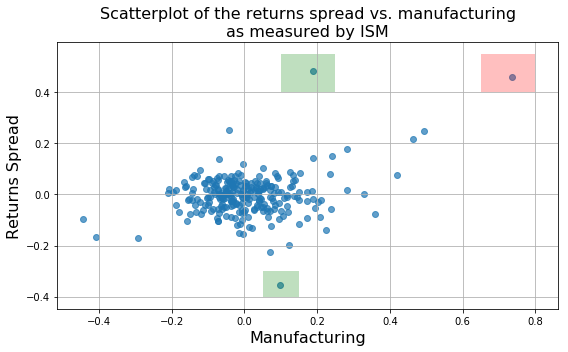

In [28]:
# scatter the returns spread versus manufacturing

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x='ISM', y='Spread', data=concat, alpha=0.7)

ax.fill_between([0.65, 0.8], 0.4, 0.55, facecolor='red', alpha=0.25, interpolate=True)
ax.fill_between([0.05, 0.15], -0.4, -0.3, facecolor='green', alpha=0.25, interpolate=True)
ax.fill_between([0.10, 0.25], 0.4, 0.55, facecolor='green', alpha=0.25, interpolate=True)

ax.set_xlabel('Manufacturing', fontsize=16)
ax.set_ylabel('Returns Spread', fontsize=16)
ax.set_title('Scatterplot of the returns spread vs. manufacturing\nas measured by ISM', fontsize=16)

ax.grid(True)
fig.tight_layout()

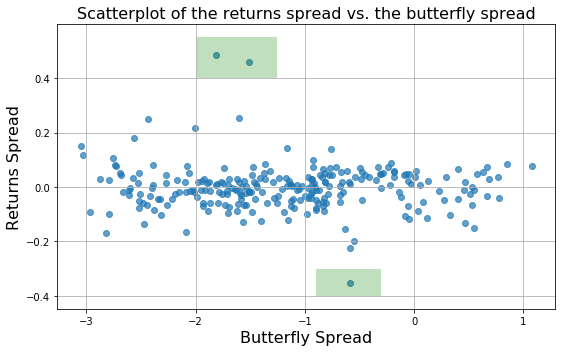

In [29]:
# scatter the returns spread versus the butterfly spread

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x='bfly', y='Spread', data=concat, alpha=0.7)

ax.fill_between([-2, -1.25], 0.4, 0.55, facecolor='green', alpha=0.25, interpolate=True)
ax.fill_between([-0.9, -0.3], -0.4, -0.3, facecolor='green', alpha=0.25, interpolate=True)

ax.set_xlabel('Butterfly Spread', fontsize=16)
ax.set_ylabel('Returns Spread', fontsize=16)
ax.set_title('Scatterplot of the returns spread vs. the butterfly spread', fontsize=16)

ax.grid(True)
fig.tight_layout()

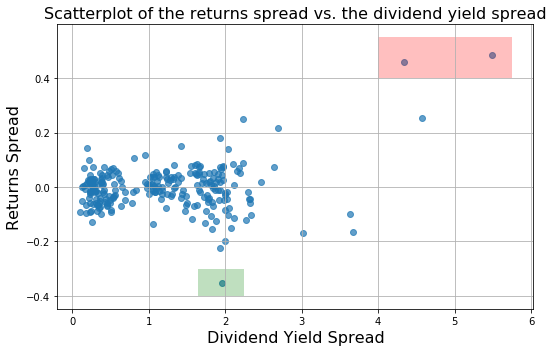

In [30]:
# scatter the returns spread versus the dividend yield spread

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x='divy', y='Spread', data=concat, alpha=0.7)

ax.fill_between([4, 5.75], 0.4, 0.55, facecolor='red', alpha=0.25, interpolate=True)
ax.fill_between([1.65, 2.25], -0.4, -0.3, facecolor='green', alpha=0.25, interpolate=True)

ax.set_xlabel('Dividend Yield Spread', fontsize=16)
ax.set_ylabel('Returns Spread', fontsize=16)
ax.set_title('Scatterplot of the returns spread vs. the dividend yield spread', fontsize=16)

ax.grid(True)
fig.tight_layout()

### The scatterplots are as expected, where many observations are bunched up around a centerpoint with few outliers branching outward.  An interesting observation concerns the two positive outliers (i.e., those with a returns spread above 0.4) and the one negative outlier (returns spread less than -0.3): the positive outliers additionally are often outliers with respect to the feature's univariate distribution (light red fill), whereas the negative outlier does not appear to be an outlier from the feature's perspective (light green fill).

###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

## It remains to be seen where to best lag some of the features in order to optimize predictive power (for example, some features might correlate more strongly with the target if the features are lagged by a few months or more).  Additionally, pairwise correlations need to be examined in order to explore whether there exists any multicollinearity.  As indicated earlier, filtering on the financial crisis (mid-2007 to mid-2009) is likely to reveal higher correlations than those witnessed during less distressed periods.
### These are considerations for exploratory data analysis

### Export the DF that contains the features and the target so that it can be used in later notebooks

In [31]:
concat.to_csv('DF.csv')